<a href="https://colab.research.google.com/github/brainopensource/datascience-mvp/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas para conclusão da Sprint da Pós-Graduação em Ciência de Dados e Analytics (PUC Rio)

# Aluno Lucas da S. Rocha

## 1. Introdução

Este notebook apresenta o desenvolvimento de um Mínimo Produto Viável (MVP) como parte do primeiro módulo da Pós-Graduação em Ciência de Dados e Analytics da PUC-Rio. Utilizando dados abertos recentes sobre a produção de petróleo e gás no Brasil, disponibilizados pela Agência Nacional de Petróleo (ANP), o objetivo deste projeto é aplicar técnicas de ciência de dados para explorar, processar e gerar insights iniciais, abrindo caminho para futuras análises de maior valor.

A proposta central é explorar os dados de produção de petróleo e gás na região do pré-sal a partir de 2020, com foco em estatísticas descritivas, pré-processamento, e visualizações que destaquem as dinâmicas produtivas. O escopo inicial inclui operações de limpeza e organização dos dados, bem como a construção de insights preliminares sobre o setor de upstream, abordando a produção por poço e suas características específicas.

Este MVP não só contribui para uma maior compreensão da indústria de petróleo e gás no Brasil nos últimos cinco anos, como também estabelece uma base sólida para análises preditivas e avanços no uso de técnicas de machine learning em projetos futuros. Assim, o projeto serve tanto a propósitos acadêmicos quanto práticos, fornecendo uma visão inicial sobre a produção de petróleo no pré-sal e potencializando aplicações futuras.

## Definição do Problema

O petróleo continua sendo um ativo estratégico no cenário energético global, afetado por fatores geopolíticos e pela volatilidade dos mercados internacionais. Nesse cenário, o Brasil se destaca como um dos principais produtores mundiais de petróleo e gás natural, tornando sua produção um tema relevante para análises e tomadas de decisão.

O objetivo deste trabalho é investigar a produção de petróleo e gás natural por poço, utilizando dados que abrangem o período de janeiro de 2020 até o primeiro semestre de 2024. Esse recorte captura as tendências mais recentes da indústria e nos permite explorar os fatores que influenciam a produtividade e a eficiência. A partir da aplicação de técnicas de ciência de dados, buscamos identificar padrões produtivos, anomalias e insights que possam otimizar a alocação de recursos e aumentar a eficiência e previsibilidade operacional e financeira.

A riqueza dos dados por poço oferece oportunidades significativas para análises detalhadas. Através de métodos estatísticos e, futuramente, de algoritmos de aprendizado de máquina, pretendemos explorar diversas aplicações, incluindo:    Análise de Eficiência da Produção, Geração de Curvas de Decaimento de Poços,    Classificação de Poços por Eficiência, Previsão da Produção Total por Campo e   Previsão de Royalties.

Essas análises iniciais geram insights valiosos para a gestão e a operação de poços e campos. O pré-processamento dos dados e a análise exploratória formam a base necessária para futuras implementações de machine learning, facilitando o desenvolvimento de modelos preditivos robustos e a criação de ferramentas analíticas capazes de fornecer uma visão mais profunda das dinâmicas de produção. Isso permitirá decisões mais assertivas e bem embasadas no contexto da produção de petróleo e gás natural no Brasil.


## 3. Código do MVP

### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import warnings
import missingno as msno

### Funções auxiliares

In [2]:
# Função para gerar indice unico com hash
def hash_column(row, col1, col2, col3):
    """
    Gera um hash MD5 único para uma linha do DataFrame, combinando os valores
    de duas colunas especificadas.

    Args:
        row (pd.Series): A linha do DataFrame que contém os dados.
        col1 (str): O nome da primeira coluna a ser combinada.
        col2 (str): O nome da segunda coluna a ser combinada.

    Returns:
        str: Um hash MD5 gerado a partir dos valores combinados das duas colunas.
    """
    return hashlib.md5(f"{row[col1]}_{row[col2]}_{row[col3]}".encode()).hexdigest()

### Configuração do Ambiente

In [3]:
# Definindo o limite de exibição colunas de dataframe para None (sem limite)
pd.set_option('display.max_columns', None)

# Definindo o limite de exibição de linhas de dataframe para 48
pd.set_option('display.max_rows', 48)

# Filter warnings
warnings.filterwarnings('ignore')

### Criando lista de URLs de datasets

In [4]:
# Criando lista de anos e meses
anos = [2020, 2021, 2022, 2023, 2024]
meses = [str(i).zfill(2) for i in range(1, 13)]

# Criando uma lista 1D com todas as URLs
urls = []

# Iterando no repositório criado para criar a lista
for ano in anos:
    if ano == 2024:
        meses_ano = meses[:6]  # Apenas os primeiros 6 meses de 2024
    else:
        meses_ano = meses  # Todos os meses para os outros anos

    for mes in meses_ano:
        url = f'https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/main/main/{ano}/{ano}_{mes}_producao_PreSal.csv'
        urls.append(url)

### Carregamento e concatenação dos datasets

In [5]:
# Carregando todos os arquivos CSV em uma lista de DataFrames
list_df_prod = [pd.read_csv(url, sep=';', encoding='latin-1') for url in urls]

# Fazendo concatenação de todos os DataFrames da lista em um único DataFrame
df_production = pd.concat(list_df_prod, ignore_index=True)

### Transformação dos dados

In [6]:
# Renomeando as colunas para nomes mais simplificados e claros
df_production.columns = [
    "estado", "bacia", "nome_poco_anp", "nome_poco_operador", "campo", "operador",
    "numero_contrato", "periodo", "oleo_bbldia", "condensado_bbldia", "petroleo_bbldia",
    "gas_natural_m3dia_assoc", "gas_natural_m3dia_nassoc", "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes", "agua_bbldia", "instalacao_destino", "tipo_instalacao",
    "tempo_producao_hspormes", "periodo_carga", "corrente", "grau_api",
    "fracao_destilados_lev_corte", "fracao_destilados_lev_vol", "fracao_destilados_med_corte",
    "fracao_destilados_med_vol", "fracao_destilados_pes_corte", "fracao_destilados_pes_vol",
    "perc_vol_metano", "perc_vol_etano", "perc_vol_propano", "perc_vol_isobutano", "perc_vol_butano",
    "perc_vol_isopentano", "perc_vol_npentano", "perc_vol_hexanos", "perc_vol_heptanos",
    "perc_vol_octanos", "perc_vol_nonanos", "perc_vol_decanos", "perc_vol_undecanos",
    "perc_vol_oxigenio", "perc_vol_nitrogenio", "perc_vol_gas_carbonico", "densidade_glp_gas",
    "densidade_glp_liquido", "pcs_gp_kj_m3", "data_atualizacao"
]

# Criar uma coluna com índice único usando hash
df_production['unique_index'] = df_production.apply(hash_column, axis=1, args=('nome_poco_anp', 'periodo', 'campo'))

# Definir a nova coluna 'indice_unico' como o índice do DataFrame
df_production.set_index('unique_index', inplace=True)

# Exibe as primeiras 5 linhas do dataset concatenado
display(df_production.head(5))

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes,periodo_carga,corrente,grau_api,fracao_destilados_lev_corte,fracao_destilados_lev_vol,fracao_destilados_med_corte,fracao_destilados_med_vol,fracao_destilados_pes_corte,fracao_destilados_pes_vol,perc_vol_metano,perc_vol_etano,perc_vol_propano,perc_vol_isobutano,perc_vol_butano,perc_vol_isopentano,perc_vol_npentano,perc_vol_hexanos,perc_vol_heptanos,perc_vol_octanos,perc_vol_nonanos,perc_vol_decanos,perc_vol_undecanos,perc_vol_oxigenio,perc_vol_nitrogenio,perc_vol_gas_carbonico,densidade_glp_gas,densidade_glp_liquido,pcs_gp_kj_m3,data_atualizacao
unique_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9dd1e58b0aee66e0bf498edb0672ae27,Rio de Janeiro,Santos,3-BRSA-1053-RJS,3RJS699,BÚZIOS,Petrobras,48610012913201005,2020/01,"24467,2395",0,"24467,2395","888,2217",0,"888,2217","2802,58076","24,4915",Petrobras 75 (P-75),UEP,728,2019/11,Búzios,"27,9",< 270ºC,"31,07%",270ºC a 458ºC,"30,08%",> 458ºC,"38,85%","56,59","8,58","5,86","1,03","2,29",",56",",79",",48",",24",",14",",12",",12",0.0,",07",",96","22,17","2,04895","533,89768","30644,7801",21/09/2024
318d465f19651f92fc9208cb8d248051,Rio de Janeiro,Santos,3-BRSA-1064-RJS,3RJS700,BÚZIOS,Petrobras,48610012913201005,2020/01,"22625,6626",0,"22625,6626","914,715",0,"914,715","2886,1741","45,3417",Petrobras 76,UEP,513,2019/11,Búzios,"27,9",< 270ºC,"31,07%",270ºC a 458ºC,"30,08%",> 458ºC,"38,85%","56,59","8,58","5,86","1,03","2,29",",56",",79",",48",",24",",14",",12",",12",0.0,",07",",96","22,17","2,04895","533,89768","30644,7801",21/09/2024
3c0eb4f23c0ca1f41dbd8a49c4606b54,Rio de Janeiro,Santos,3-BRSA-1184-RJS,3RJS723,BÚZIOS,Petrobras,48610012913201005,2020/01,"23623,1794",0,"23623,1794","823,4495",0,"823,4495","2598,20685","36,2177",Petrobras 77,UEP,640,2019/11,Búzios,"27,9",< 270ºC,"31,07%",270ºC a 458ºC,"30,08%",> 458ºC,"38,85%","56,59","8,58","5,86","1,03","2,29",",56",",79",",48",",24",",14",",12",",12",0.0,",07",",96","22,17","2,04895","533,89768","30644,7801",21/09/2024
56ecdd308dd73382b3e7933245f238b3,Rio de Janeiro,Santos,9-BRSA-1191-RJS,9RJS708,BÚZIOS,Petrobras,48610012913201005,2020/01,"37249,8863",0,"37249,8863","1472,1804",0,"1472,1804","4645,12903",0,Petrobras 74 (P-74),UEP,661,2019/11,Búzios,"27,9",< 270ºC,"31,07%",270ºC a 458ºC,"30,08%",> 458ºC,"38,85%","56,59","8,58","5,86","1,03","2,29",",56",",79",",48",",24",",14",",12",",12",0.0,",07",",96","22,17","2,04895","533,89768","30644,7801",21/09/2024
8bda074c1e755c84bd30a7396d26f4b0,Rio de Janeiro,Santos,9-BUZ-1-RJS,9BUZ1RJS,BÚZIOS,Petrobras,48610012913201005,2020/01,"22968,7238",0,"22968,7238","925,5371",0,"925,5371","2920,32088","15,1761",Petrobras 76,UEP,578,2019/11,Búzios,"27,9",< 270ºC,"31,07%",270ºC a 458ºC,"30,08%",> 458ºC,"38,85%","56,59","8,58","5,86","1,03","2,29",",56",",79",",48",",24",",14",",12",",12",0.0,",07",",96","22,17","2,04895","533,89768","30644,7801",21/09/2024


In [7]:
# Separar em dois DataFrames
df_tipo_oleo = df_production.iloc[:, 19:]  # Seleciona as colunas restantes com dados de hidrocarbonetos que não serão usadas nesse trabalho
df_production = df_production.iloc[:, :19]  # Seleciona as primeiras 21 colunas com dados de produção

# Verificar a separação dos datasets, iremos focar nos dados de produção nesse trabalho
display(df_production.head())

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
9dd1e58b0aee66e0bf498edb0672ae27,Rio de Janeiro,Santos,3-BRSA-1053-RJS,3RJS699,BÚZIOS,Petrobras,48610012913201005,2020/01,"24467,2395",0,"24467,2395","888,2217",0,"888,2217","2802,58076","24,4915",Petrobras 75 (P-75),UEP,728
318d465f19651f92fc9208cb8d248051,Rio de Janeiro,Santos,3-BRSA-1064-RJS,3RJS700,BÚZIOS,Petrobras,48610012913201005,2020/01,"22625,6626",0,"22625,6626","914,715",0,"914,715","2886,1741","45,3417",Petrobras 76,UEP,513
3c0eb4f23c0ca1f41dbd8a49c4606b54,Rio de Janeiro,Santos,3-BRSA-1184-RJS,3RJS723,BÚZIOS,Petrobras,48610012913201005,2020/01,"23623,1794",0,"23623,1794","823,4495",0,"823,4495","2598,20685","36,2177",Petrobras 77,UEP,640
56ecdd308dd73382b3e7933245f238b3,Rio de Janeiro,Santos,9-BRSA-1191-RJS,9RJS708,BÚZIOS,Petrobras,48610012913201005,2020/01,"37249,8863",0,"37249,8863","1472,1804",0,"1472,1804","4645,12903",0,Petrobras 74 (P-74),UEP,661
8bda074c1e755c84bd30a7396d26f4b0,Rio de Janeiro,Santos,9-BUZ-1-RJS,9BUZ1RJS,BÚZIOS,Petrobras,48610012913201005,2020/01,"22968,7238",0,"22968,7238","925,5371",0,"925,5371","2920,32088","15,1761",Petrobras 76,UEP,578


In [8]:
colunas_datetime = [
    "periodo",
]

# Listagem das colunas a serem convertidas para float
colunas_str_to_float = [
    "oleo_bbldia",
    "petroleo_bbldia",
    "gas_natural_m3dia_assoc",
    "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes",
    "agua_bbldia",
]

print('\n Tipos de dados das colunas antes da conversão \n\n', df_production.dtypes)

# Substituir vírgulas por pontos e converter para float
for coluna in colunas_str_to_float:
    df_production[coluna] = df_production[coluna].str.replace(',', '.').astype(float)

df_production['condensado_bbldia'] = df_production['condensado_bbldia'].astype(float)

# Aplicando formato de data datetime na coluna 'periodo'
for coluna in colunas_datetime:
    df_production[coluna] = pd.to_datetime(df_production[coluna], format='%Y/%m')

# Verificar os tipos de dados das colunas após conversão
print("\n Tipos de dados das colunas após conversão \n\n", df_production.dtypes)

# Verificar as primeiras linhas do DataFrame para confirmar as conversões
display(df_production.head())


 Tipos de dados das colunas antes da conversão 

 estado                        object
bacia                         object
nome_poco_anp                 object
nome_poco_operador            object
campo                         object
operador                      object
numero_contrato               object
periodo                       object
oleo_bbldia                   object
condensado_bbldia              int64
petroleo_bbldia               object
gas_natural_m3dia_assoc       object
gas_natural_m3dia_nassoc       int64
gas_natural_m3dia_total       object
volume_gas_royalties_m3mes    object
agua_bbldia                   object
instalacao_destino            object
tipo_instalacao               object
tempo_producao_hspormes        int64
dtype: object

 Tipos de dados das colunas após conversão 

 estado                                object
bacia                                 object
nome_poco_anp                         object
nome_poco_operador                    object
campo

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
9dd1e58b0aee66e0bf498edb0672ae27,Rio de Janeiro,Santos,3-BRSA-1053-RJS,3RJS699,BÚZIOS,Petrobras,48610012913201005,2020-01-01,24467.2395,0.0,24467.2395,888.2217,0,888.2217,2802.58076,24.4915,Petrobras 75 (P-75),UEP,728
318d465f19651f92fc9208cb8d248051,Rio de Janeiro,Santos,3-BRSA-1064-RJS,3RJS700,BÚZIOS,Petrobras,48610012913201005,2020-01-01,22625.6626,0.0,22625.6626,914.7150,0,914.7150,2886.17410,45.3417,Petrobras 76,UEP,513
3c0eb4f23c0ca1f41dbd8a49c4606b54,Rio de Janeiro,Santos,3-BRSA-1184-RJS,3RJS723,BÚZIOS,Petrobras,48610012913201005,2020-01-01,23623.1794,0.0,23623.1794,823.4495,0,823.4495,2598.20685,36.2177,Petrobras 77,UEP,640
56ecdd308dd73382b3e7933245f238b3,Rio de Janeiro,Santos,9-BRSA-1191-RJS,9RJS708,BÚZIOS,Petrobras,48610012913201005,2020-01-01,37249.8863,0.0,37249.8863,1472.1804,0,1472.1804,4645.12903,0.0000,Petrobras 74 (P-74),UEP,661
8bda074c1e755c84bd30a7396d26f4b0,Rio de Janeiro,Santos,9-BUZ-1-RJS,9BUZ1RJS,BÚZIOS,Petrobras,48610012913201005,2020-01-01,22968.7238,0.0,22968.7238,925.5371,0,925.5371,2920.32088,15.1761,Petrobras 76,UEP,578


In [9]:
# Fator de conversão de metros cúbicos para pés cúbicos
fator_m3_para_mmsfc = 35.3147

# Lista das colunas a serem convertidas de m³ para MMSCFD
colunas_m3_para_mmscf = [
    "gas_natural_m3dia_assoc",
    "gas_natural_m3dia_nassoc",
    "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes"
]

# Lista das colunas a serem convertidas de BBL para KBD
colunas_bbl_para_kbd = [
    "oleo_bbldia",
    "condensado_bbldia",
    "petroleo_bbldia",
    "agua_bbldia"
]

# Convertendo as colunas de m³ para MMSCFD
for coluna in colunas_m3_para_mmscf:
    df_production[coluna] = (df_production[coluna] * fator_m3_para_mmsfc) / 1000

# Convertendo as colunas de BBL para KBD
for coluna in colunas_bbl_para_kbd:
    df_production[coluna] = df_production[coluna] / 1000


# Dicionários com os novos nomes que serão usados após a mudança de unidades
dicionario_renomeacao_m3 = {
    "gas_natural_m3dia_assoc": "gas_natural_mmscf_assoc",
    "gas_natural_m3dia_nassoc": "gas_natural_mmscf_nassoc",
    "gas_natural_m3dia_total": "gas_natural_mmscf_total",
    "volume_gas_royalties_m3mes": "volume_gas_royalties_mmscf"
}

dicionario_renomeacao_bbl = {
    "oleo_bbldia": "oleo_kbd",
    "condensado_bbldia": "condensado_kbd",
    "petroleo_bbldia": "petroleo_kbd",
    "agua_bbldia": "agua_kbd"
}

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_m3, inplace=True)

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_bbl, inplace=True)

# Verificar os primeiros registros para garantir que a conversão e renomeação foram realizadas corretamente
display(df_production.head())

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
9dd1e58b0aee66e0bf498edb0672ae27,Rio de Janeiro,Santos,3-BRSA-1053-RJS,3RJS699,BÚZIOS,Petrobras,48610012913201005,2020-01-01,24.467239,0.0,24.467239,31.367283,0.0,31.367283,98.972299,0.024491,Petrobras 75 (P-75),UEP,728
318d465f19651f92fc9208cb8d248051,Rio de Janeiro,Santos,3-BRSA-1064-RJS,3RJS700,BÚZIOS,Petrobras,48610012913201005,2020-01-01,22.625663,0.0,22.625663,32.302886,0.0,32.302886,101.924372,0.045342,Petrobras 76,UEP,513
3c0eb4f23c0ca1f41dbd8a49c4606b54,Rio de Janeiro,Santos,3-BRSA-1184-RJS,3RJS723,BÚZIOS,Petrobras,48610012913201005,2020-01-01,23.623179,0.0,23.623179,29.079872,0.0,29.079872,91.754895,0.036218,Petrobras 77,UEP,640
56ecdd308dd73382b3e7933245f238b3,Rio de Janeiro,Santos,9-BRSA-1191-RJS,9RJS708,BÚZIOS,Petrobras,48610012913201005,2020-01-01,37.249886,0.0,37.249886,51.989609,0.0,51.989609,164.041338,0.000000,Petrobras 74 (P-74),UEP,661
8bda074c1e755c84bd30a7396d26f4b0,Rio de Janeiro,Santos,9-BUZ-1-RJS,9BUZ1RJS,BÚZIOS,Petrobras,48610012913201005,2020-01-01,22.968724,0.0,22.968724,32.685065,0.0,32.685065,103.130256,0.015176,Petrobras 76,UEP,578


### Verificação de duplicados

In [10]:
# Analisando as colunas periodo, campo e nome_poco_anp que combinadas são unicas nos registros de produção
duplicados_dados = df_production.duplicated(subset=['nome_poco_anp', 'periodo', 'campo'], keep=False)

# Verificar se existem duplicatas
print(f"Existem duplicatas nos dados? {'Sim' if duplicados_dados.any() else 'Não'}")

Existem duplicatas nos dados? Não


### Descrição dos dados

In [11]:
# Número de atributos (colunas) e instâncias (linhas)
num_atributos = df_production.shape[1]
num_instancias = df_production.shape[0]

# Tipos de dados dos atributos
tipos_dados = df_production.dtypes

# Contagem de valores faltantes por coluna
valores_faltantes = df_production.isnull().sum()

# Resumo estatístico dos dados numéricos
resumo_estatistico = df_production.describe()

# Printando os resultados com f-strings
print(f"Número de atributos: {num_atributos}")
print(f"Número de instâncias: {num_instancias}")
display(f"Tipos de dados dos atributos", tipos_dados)
display(f"Valores faltantes por coluna", valores_faltantes)
display(f"Resumo estatístico dos atributos numéricos", resumo_estatistico)

Número de atributos: 19
Número de instâncias: 18133


'Tipos de dados dos atributos'

,0
estado,object
bacia,object
nome_poco_anp,object
nome_poco_operador,object
campo,object
operador,object
numero_contrato,object
periodo,datetime64[ns]
oleo_kbd,float64
condensado_kbd,float64


'Valores faltantes por coluna'

,0
estado,0
bacia,0
nome_poco_anp,0
nome_poco_operador,0
campo,0
operador,0
numero_contrato,0
periodo,0
oleo_kbd,0
condensado_kbd,0


'Resumo estatístico dos atributos numéricos:\n'

,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,tempo_producao_hspormes
count,18133,18133.000000,18133.0,18133.000000,18133.000000,18133.0,18133.000000,18133.000000,18133.000000,18133.000000
mean,2022-04-13 07:12:33.830033408,6.876794,0.0,6.876794,10.319218,0.0,10.319218,124.877360,0.647963,516.121381
min,2020-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2021-03-01 00:00:00,0.116443,0.0,0.116443,0.166120,0.0,0.166120,1.792468,0.000001,429.000000
50%,2022-05-01 00:00:00,1.414066,0.0,1.414066,1.965606,0.0,1.965606,22.743867,0.006304,625.000000
75%,2023-06-01 00:00:00,12.061435,0.0,12.061435,16.609249,0.0,16.609249,172.701879,0.093222,685.000000
max,2024-06-01 00:00:00,56.094150,0.0,56.094150,116.881338,0.0,116.881338,1362.907892,27.022978,751.000000
std,NaN,9.756390,0.0,9.756390,15.702179,0.0,15.702179,197.399971,2.173912,230.808298


### Verificação Visual de Nulos

Neste projeto, não será realizado o tratamento de valores faltantes, pois o dataset apresenta uma qualidade satisfatória para a fase inicial de análise. A maioria das colunas essenciais para as nossas análises de produção de petróleo e gás não possui valores nulos. As colunas que apresentam valores faltantes, como "instalação_destino" e "tipo_de_instalação", não serão utilizadas nesta fase do projeto, que se concentra principalmente na eficiência de produção, análise de declínio e previsões de royalties e produção por campo.

Como essas variáveis não são críticas para os objetivos do MVP (Produto Mínimo Viável), o tratamento desses valores poderá ser revisitado em fases futuras, quando aprofundarmos as análises ou desenvolvermos novos insights que requeiram esses atributos.

<Axes: >

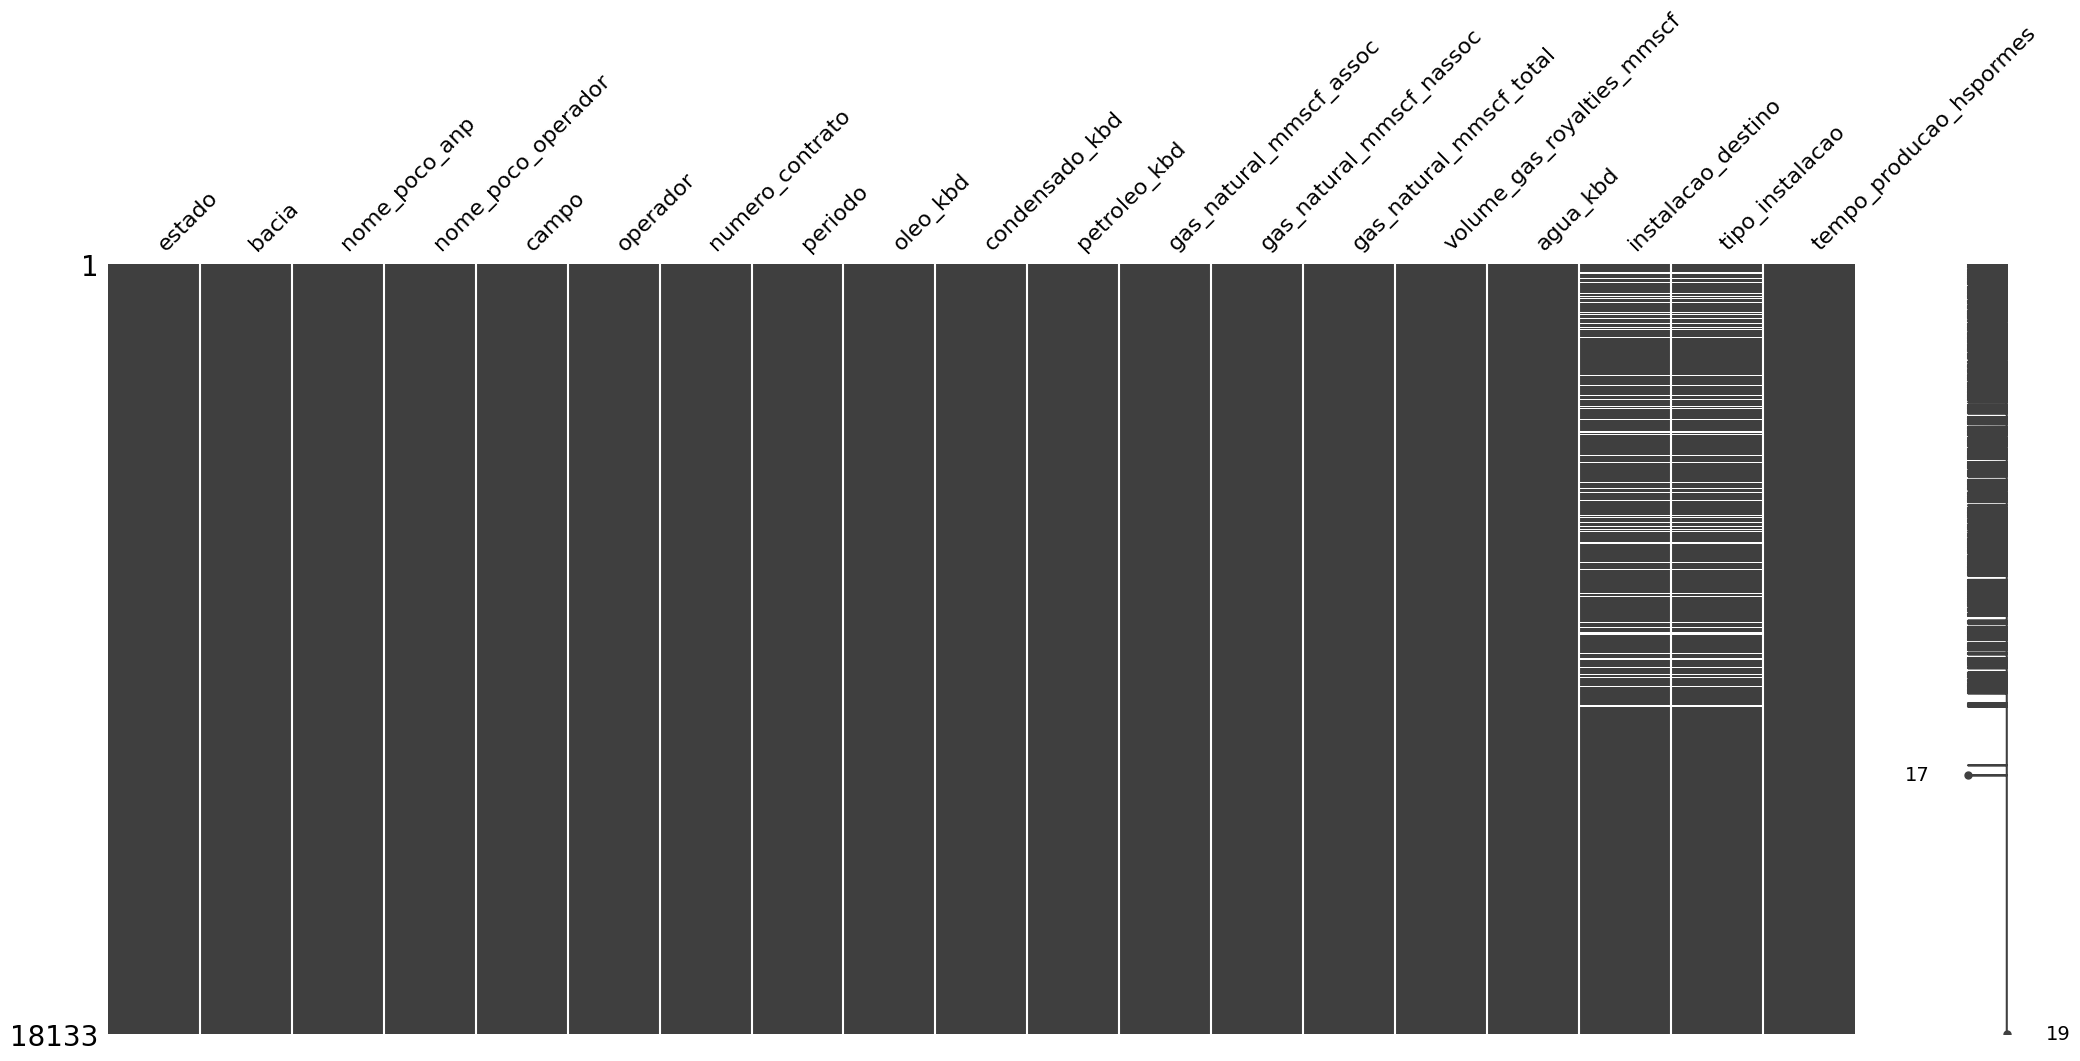

In [12]:
# Visualizar valores nulos
msno.matrix(df_production)

### Verificação quantitativa

Produção média de petróleo no pré-sal em 2020, em milhões de barris por dia: 2.04
Produção média de petróleo no pré-sal em 2021, em milhões de barris por dia: 2.14
Produção média de petróleo no pré-sal em 2022, em milhões de barris por dia: 2.30
Produção média de petróleo no pré-sal em 2023, em milhões de barris por dia: 2.60
Produção média de petróleo no pré-sal em 2024, em milhões de barris por dia: 2.61


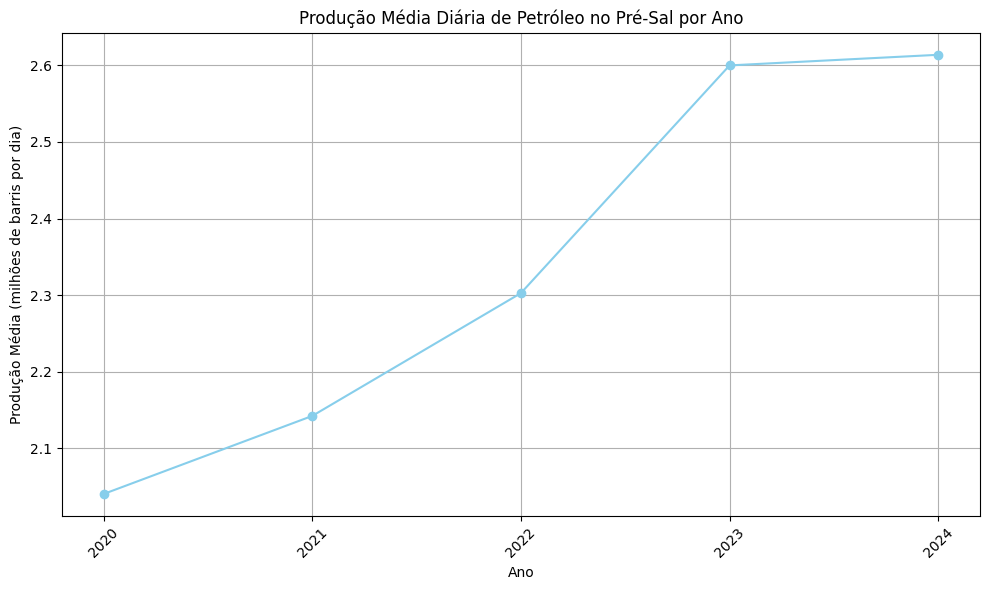

In [13]:
# Certifique-se de que a coluna 'periodo' está no formato datetime
df_production['periodo'] = pd.to_datetime(df_production['periodo'])

# Adicionar uma coluna de ano ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year

# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano').apply(lambda x: x.groupby(x['periodo'].dt.date)['oleo_kbd'].sum())

# Calcular a produção média diária para cada ano
media_diaria_por_ano = producoes_anuais.groupby('ano').mean() / 1000  # Convertendo para milhões de barris

# Exibir o resultado para cada ano
for ano, media in media_diaria_por_ano.items():
    print(f"Produção média de petróleo no pré-sal em {ano}, em milhões de barris por dia: {media:.2f}")

# Criando gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_diaria_por_ano.index.astype(str), media_diaria_por_ano.values, marker='o', color='skyblue', linestyle='-')
plt.title('Produção Média Diária de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Média (milhões de barris por dia)')
plt.xticks(rotation=45)
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

Produção total de petróleo no pré-sal em 2020, em milhões de barris: 24.48
Produção total de petróleo no pré-sal em 2021, em milhões de barris: 25.70
Produção total de petróleo no pré-sal em 2022, em milhões de barris: 27.63
Produção total de petróleo no pré-sal em 2023, em milhões de barris: 31.20
Produção total de petróleo no pré-sal em 2024, em milhões de barris: 15.68


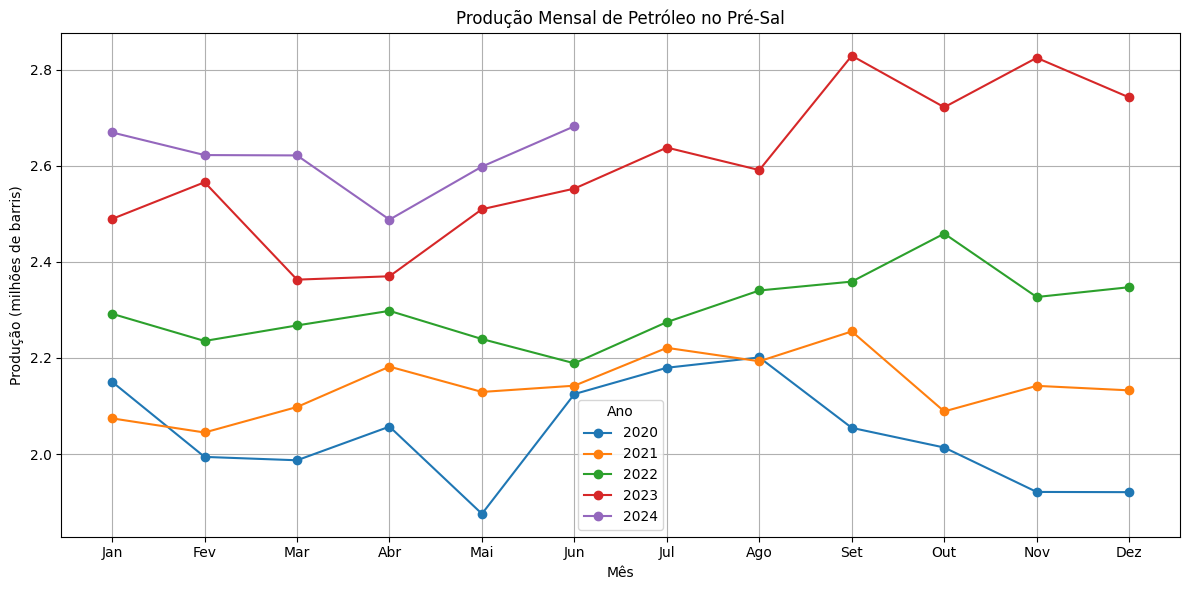

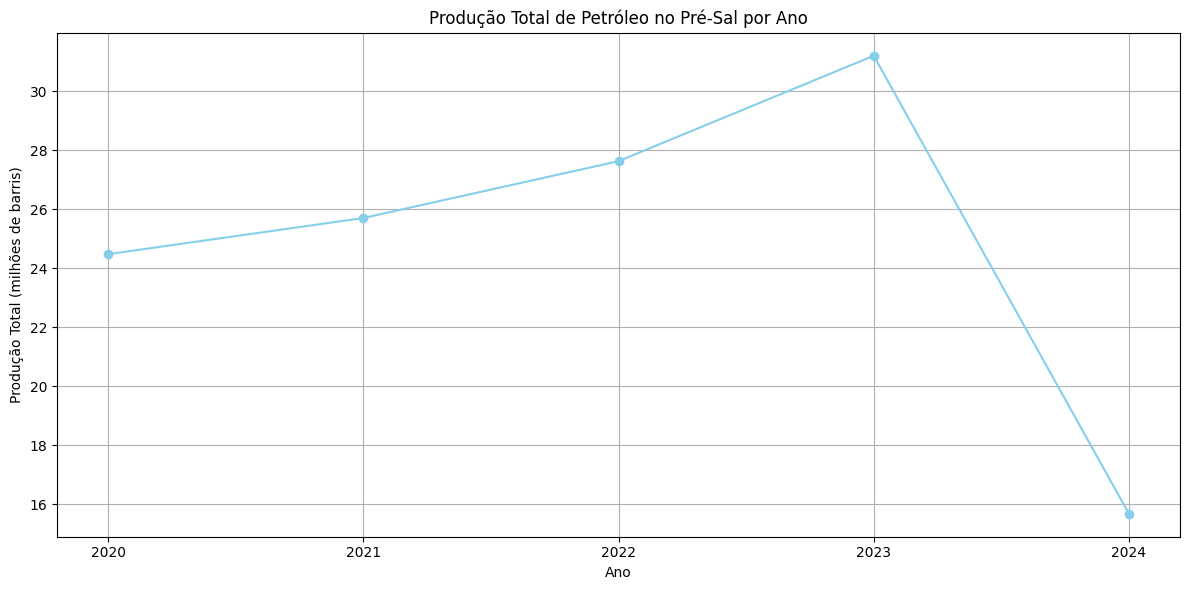

In [24]:
# Adicionar colunas de ano e mês ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year
df_production['mes'] = df_production['periodo'].dt.month

# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para milhões de barris

# Agrupar os dados por ano e mês e somar a produção
producoes_mensais = df_production.groupby(['ano', 'mes'])['oleo_kbd'].sum().unstack()

# Exibir o resultado para cada ano
for ano, media in producoes_anuais.items():
    print(f"Produção total de petróleo no pré-sal em {ano}, em milhões de barris: {media:.2f}")

# Criando gráfico de linhas para produção mensal
plt.figure(figsize=(12, 6))
for ano in producoes_mensais.index:
    plt.plot(producoes_mensais.columns, producoes_mensais.loc[ano] / 1000, marker='o', label=ano)  # Convertendo para milhões de barris

plt.title('Produção Mensal de Petróleo no Pré-Sal')
plt.xlabel('Mês')
plt.ylabel('Produção (milhões de barris)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.tight_layout()
plt.show()

# Criando gráfico de linhas para produção total anual
plt.figure(figsize=(12, 6))
plt.plot(producoes_anuais.index.astype(str), producoes_anuais.values, marker='o', color='skyblue', linestyle='-')
plt.title('Produção Total de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total (milhões de barris)')
plt.grid()
plt.tight_layout()
plt.show()

Produção total de petróleo no pré-sal em 2020, em milhões de barris: 24.48
Produção total de petróleo no pré-sal em 2021, em milhões de barris: 25.70
Produção total de petróleo no pré-sal em 2022, em milhões de barris: 27.63
Produção total de petróleo no pré-sal em 2023, em milhões de barris: 31.20
Produção total de petróleo no pré-sal em 2024, em milhões de barris: 15.68


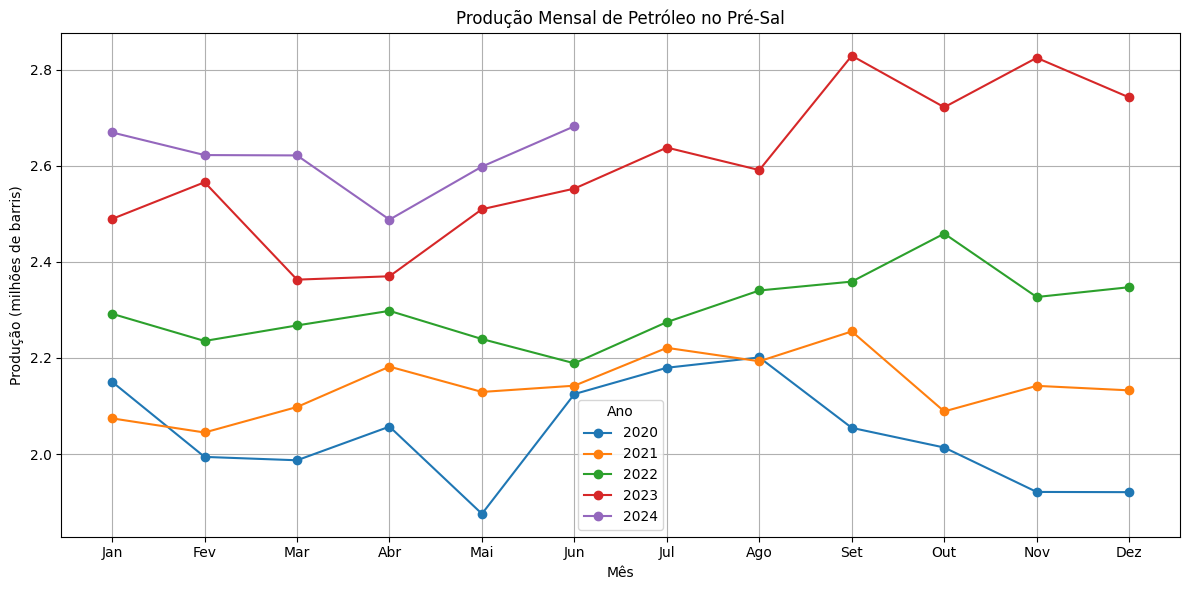

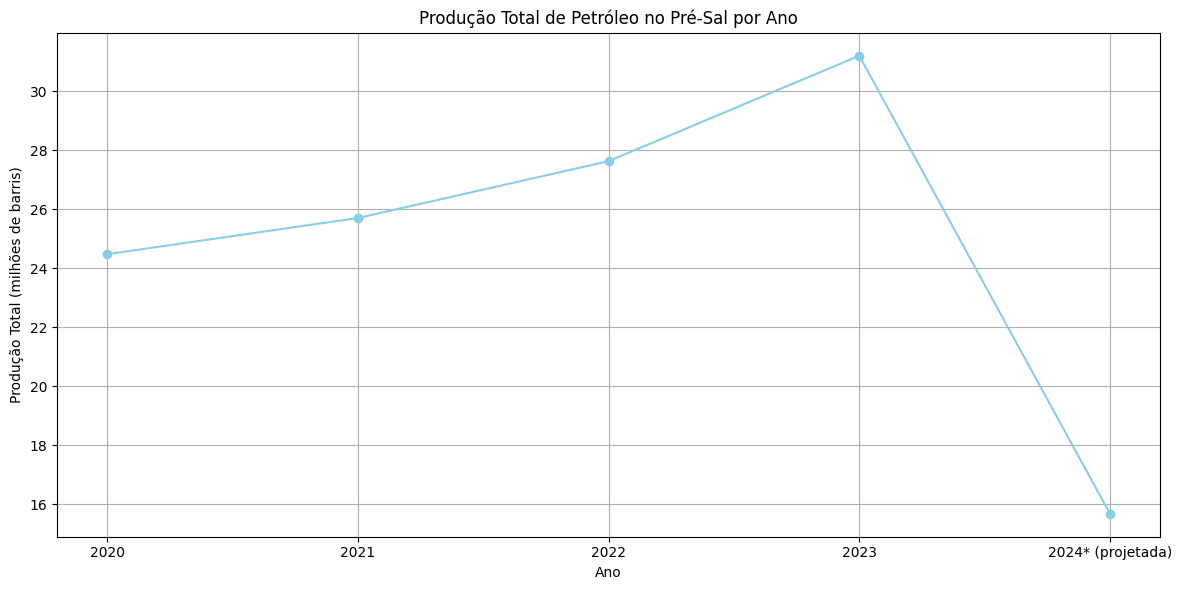

In [25]:
# Adicionar colunas de ano e mês ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year
df_production['mes'] = df_production['periodo'].dt.month

# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para milhões de barris

# Agrupar os dados por ano e mês e somar a produção
producoes_mensais = df_production.groupby(['ano', 'mes'])['oleo_kbd'].sum().unstack()

# Exibir o resultado para cada ano
for ano, media in producoes_anuais.items():
    print(f"Produção total de petróleo no pré-sal em {ano}, em milhões de barris: {media:.2f}")

# Criando gráfico de linhas para produção mensal
plt.figure(figsize=(12, 6))
for ano in producoes_mensais.index:
    plt.plot(producoes_mensais.columns, producoes_mensais.loc[ano] / 1000, marker='o', label=ano)  # Convertendo para milhões de barris

plt.title('Produção Mensal de Petróleo no Pré-Sal')
plt.xlabel('Mês')
plt.ylabel('Produção (milhões de barris)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.tight_layout()
plt.show()

# Criando gráfico de linhas para produção total anual
plt.figure(figsize=(12, 6))

# Criar uma lista de strings para os anos
anos_strings = ['2020', '2021', '2022', '2023', '2024* (projetada)']  # Incluindo a projeção para 2024

# Usar a lista de strings para os rótulos do eixo x
plt.plot(anos_strings, producoes_anuais.values, marker='o', color='skyblue', linestyle='-')
plt.title('Produção Total de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total (milhões de barris)')
plt.grid()
plt.tight_layout()
plt.show()


Produção total de petróleo no pré-sal em 2020, em milhões de barris: 24.48
Produção total de petróleo no pré-sal em 2021, em milhões de barris: 25.70
Produção total de petróleo no pré-sal em 2022, em milhões de barris: 27.63
Produção total de petróleo no pré-sal em 2023, em milhões de barris: 31.20
Produção total de petróleo no pré-sal em 2024, em milhões de barris: 31.37


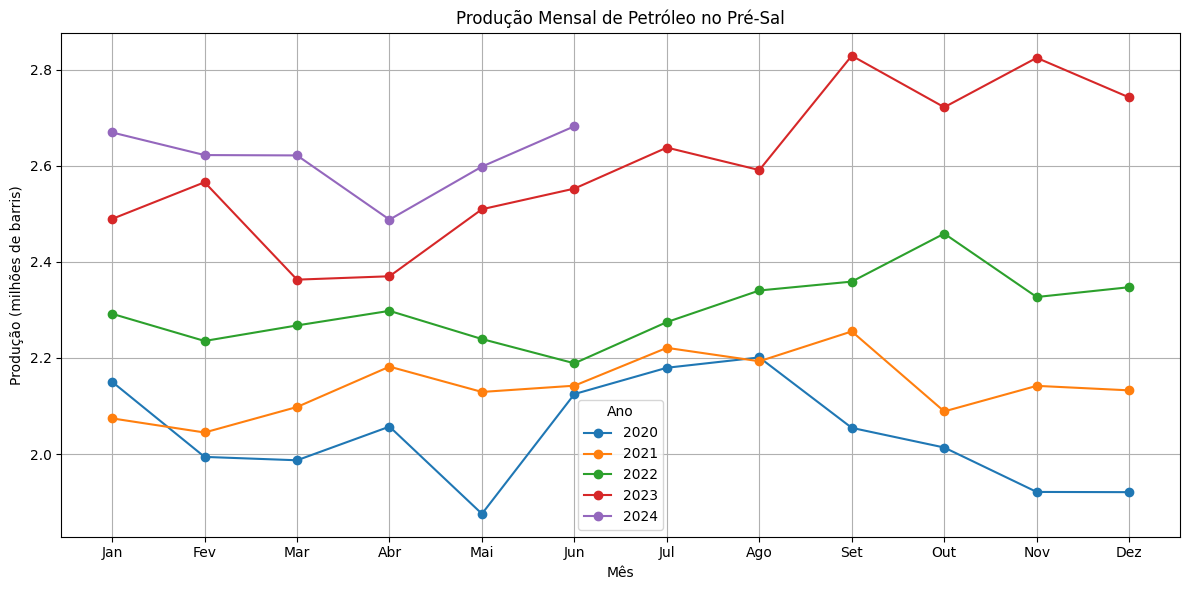

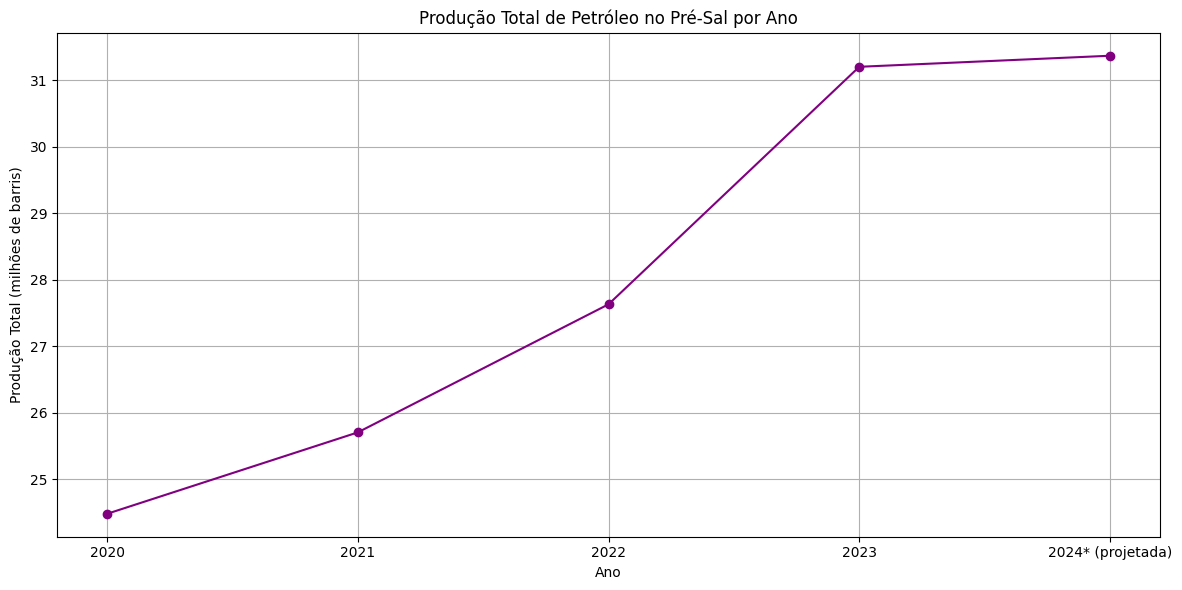

In [26]:
# Adicionar colunas de ano e mês ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year
df_production['mes'] = df_production['periodo'].dt.month

# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para milhões de barris

# Projetar a produção total de 2024
if 2024 in producoes_anuais.index:
    producoes_anuais[2024] *= 2  # Multiplicando por 2 para projetar a produção de 2024

# Agrupar os dados por ano e mês e somar a produção
producoes_mensais = df_production.groupby(['ano', 'mes'])['oleo_kbd'].sum().unstack()

# Exibir o resultado para cada ano
for ano, media in producoes_anuais.items():
    print(f"Produção total de petróleo no pré-sal em {ano}, em milhões de barris: {media:.2f}")

# Criando gráfico de linhas para produção mensal
plt.figure(figsize=(12, 6))
for ano in producoes_mensais.index:
    plt.plot(producoes_mensais.columns, producoes_mensais.loc[ano] / 1000, marker='o', label=ano)  # Convertendo para milhões de barris

plt.title('Produção Mensal de Petróleo no Pré-Sal')
plt.xlabel('Mês')
plt.ylabel('Produção (milhões de barris)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.tight_layout()
plt.show()

# Criando gráfico de linhas para produção total anual
plt.figure(figsize=(12, 6))

# Criar uma lista de strings para os anos, incluindo a projeção para 2024
anos_strings = ['2020', '2021', '2022', '2023', '2024* (projetada)']

# Usar a lista de strings para os rótulos do eixo x
plt.plot(anos_strings, producoes_anuais.values, marker='o', color='purple', linestyle='-')
plt.title('Produção Total de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total (milhões de barris)')
plt.grid()
plt.tight_layout()
plt.show()


#### Observação

A produção de petróleo no ano de 2024, até o momento, é de 15,68 milhões de barris, correspondente aos dados disponíveis apenas até o meio do ano. Isso significa que, para ter uma estimativa da produção total anual, precisamos projetar a produção do restante do ano com base nos dados atuais.

Como estamos analisando apenas os primeiros seis meses de 2024, multiplicamos a produção registrada até agora por 2. Esta projeção assume que a produção dos próximos seis meses será semelhante à produção dos primeiros seis meses. Essa abordagem é comum em análises de produção quando os dados disponíveis são limitados, permitindo estimar um total anual mais realista, porém bem conservadora.

Projeção para o ano: 15,68 milhões de barris × 2 = 31,36 milhões de barris projetados para 2024.

### Análises gráficas

In [14]:
# Filtrar apenas colunas numéricas para analises de correlação (float64, int64)
colunas_numericas = df_producao.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlação apenas para colunas numéricas
correlacoes = df_producao[colunas_numericas].corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

NameError: name 'df_producao' is not defined

In [ ]:
# Pairplot para visualizar a relação entre variáveis e possíveis padrões
sns.pairplot(df_producao, diag_kind='kde')
plt.title('Pairplot das Variáveis Numéricas')
plt.show()

In [ ]:
# Boxplot para detectar a distribuição e possíveis outliers nas variáveis numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_producao, orient='h')
plt.title('Boxplot das Variáveis de Produção')
plt.show()

In [ ]:
# Distribuição da produção de gás natural (gas_natural_mmscf_total)
plt.figure(figsize=(12, 6))
sns.histplot(df_producao['gas_natural_mmscf_total'], kde=True)
plt.title('Distribuição da Produção de Gás Natural (MMSCF)')
plt.show()

In [ ]:
# Boxplot da produção de óleo ao longo do tempo para analisar sazonalidade ou flutuações
plt.figure(figsize=(12, 6))
sns.boxplot(x='periodo', y='oleo_kbd', data=df_producao)
plt.xticks(rotation=45)
plt.title('Produção de Óleo ao Longo do Tempo')
plt.show()

In [ ]:
# Scatter plot da relação entre óleo e gás natural para explorar correlações
plt.figure(figsize=(12, 6))
sns.scatterplot(x='oleo_kbd', y='gas_natural_mmscf_total', data=df_producao)
plt.title('Relação entre Produção de Óleo e Gás Natural')
plt.show()

In [ ]:
# Análise temporal: Tendência de produção de óleo e gás ao longo do tempo
plt.figure(figsize=(12, 6))
df_producao.groupby('periodo')['oleo_kbd'].sum().plot(label='Óleo (KBD)')
df_producao.groupby('periodo')['gas_natural_mmscf_total'].sum().plot(label='Gás Natural (MMSCF)')
plt.title('Tendência de Produção de Óleo e Gás ao Longo do Tempo')
plt.legend()
plt.show()

In [ ]:
# Outliers: Identificar os poços com produção fora do comum
outliers = df_producao[(df_producao['oleo_kbd'] > df_producao['oleo_kbd'].quantile(0.99)) |
                       (df_producao['gas_natural_mmscf_total'] > df_producao['gas_natural_mmscf_total'].quantile(0.99))]
display(outliers[['nome_poco_anp', 'oleo_kbd', 'gas_natural_mmscf_total']])

# Outliers: Identificar os poços com produção fora do comum
outliers = df_producao[(df_producao['oleo_kbd'] < df_producao['oleo_kbd'].quantile(0.05)) |
                       (df_producao['gas_natural_mmscf_total'] < df_producao['gas_natural_mmscf_total'].quantile(0.05))]
display(outliers[['nome_poco_anp', 'oleo_kbd', 'gas_natural_mmscf_total']])

In [ ]:
# Calculando o número de dias de produção
df_producao['dias_producao'] = df_producao['tempo_producao_hspormes'] / 24

# Calculando a produção por dia para óleo, gás natural e água
df_producao['oleo_por_dia'] = df_producao['oleo_kbd'] / df_producao['dias_producao']
df_producao['gas_por_dia'] = df_producao['gas_natural_mmscf_total'] / df_producao['dias_producao']
df_producao['agua_por_dia'] = df_producao['agua_kbd'] / df_producao['dias_producao']

# Selecionar colunas numéricas para calcular a média
colunas_numericas = ['oleo_por_dia', 'gas_por_dia', 'agua_por_dia']

# Agrupando os dados por campo e calculando a média das colunas numéricas
df_campo_prod_dia = df_producao.groupby('campo')[colunas_numericas].mean().reset_index()

# Ordenar os campos pela produção de óleo por dia
df_campo_prod_dia = df_campo_prod_dia.sort_values(by='oleo_por_dia', ascending=False)

# Ordenar os campos para o gráfico de óleo
order_oleo = df_campo_prod_dia.sort_values(by='oleo_por_dia', ascending=False)['campo']

# Plotando gráfico da produção de óleo por dia, ordenado
plt.figure(figsize=(12, 6))
sns.barplot(x='campo', y='oleo_por_dia', data=df_campo_prod_dia, order=order_oleo)
plt.xticks(rotation=90)
plt.title('Produção de Óleo por Dia por Campo (Ordenado)')
plt.ylabel('Produção de Óleo (mil barris/dia)')
plt.xlabel('Campo')
plt.show()

# Ordenar os campos para o gráfico de gás
order_gas = df_campo_prod_dia.sort_values(by='gas_por_dia', ascending=False)['campo']

# Plotando gráfico da produção de gás natural por dia, ordenado
plt.figure(figsize=(12, 6))
sns.barplot(x='campo', y='gas_por_dia', data=df_campo_prod_dia, order=order_gas)
plt.xticks(rotation=90)
plt.title('Produção de Gás Natural por Dia por Campo (Ordenado)')
plt.ylabel('Produção de Gás Natural (MMSCF/dia)')
plt.xlabel('Campo')
plt.show()

# Ordenar os campos para o gráfico de água
order_agua = df_campo_prod_dia.sort_values(by='agua_por_dia', ascending=False)['campo']

# Plotando gráfico da produção de água por dia, ordenado
plt.figure(figsize=(12, 6))
sns.barplot(x='campo', y='agua_por_dia', data=df_campo_prod_dia, order=order_agua)
plt.xticks(rotation=90)
plt.title('Produção de Água por Dia por Campo (Ordenado)')
plt.ylabel('Produção de Água (mil barris/dia)')
plt.xlabel('Campo')
plt.show()

In [ ]:
# Agrupando os dados por campo e calculando a média das colunas numéricas
df_campo_prod_dia = df_producao.groupby('campo')[colunas_numericas].mean().reset_index()

# Ordenar os campos pela produção de óleo por dia
df_campo_prod_dia = df_campo_prod_dia.sort_values(by='oleo_por_dia', ascending=False)

# Extraindo os valores de cada produção
campos = df_campo_prod_dia['campo']
oleo = df_campo_prod_dia['oleo_por_dia']
gas = df_campo_prod_dia['gas_por_dia']
agua = df_campo_prod_dia['agua_por_dia']

# Definindo a largura das barras
bar_width = 0.5

# Posicionando os índices dos campos
indices = np.arange(len(campos))

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))

# Barras de óleo
plt.bar(indices, oleo, bar_width, label='Óleo (mil barris/dia)', color='b')

# Barras de gás (empilhado em óleo)
plt.bar(indices, gas, bar_width, bottom=oleo, label='Gás (MMSCF/dia)', color='g')

# Barras de água (empilhado em gás)
plt.bar(indices, agua, bar_width, bottom=oleo+gas, label='Água (mil barris/dia)', color='c')

# Configurações dos eixos e do gráfico
plt.xticks(indices, campos, rotation=90)
plt.xlabel('Campo')
plt.ylabel('Produção (Óleo, Gás e Água por Dia)')
plt.title('Produção Diária de Óleo, Gás e Água por Campo (Empilhado)')
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Filtrando os campos que produzem
df_producao_produtiva = df_producao[df_producao['oleo_kbd'] > 0]

# Obtendo os 5 maiores campos com base na produção total
top_campos = df_producao_produtiva.groupby('campo')['oleo_kbd'].sum().nlargest(5).index

# Filtrando o DataFrame para incluir apenas os 5 maiores campos
df_top_campos = df_producao_produtiva[df_producao_produtiva['campo'].isin(top_campos)]

# Criando histogramas para os 5 maiores campos
for campo in top_campos:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_top_campos[df_top_campos['campo'] == campo]['oleo_kbd'], bins=30, kde=True)
    plt.title(f'Distribuição da Produção de Óleo - Campo: {campo}')
    plt.xlabel('Produção de Óleo (mil barris)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


In [ ]:
# Filtrando os campos que produzem
df_producao_produtiva = df_producao[df_producao['gas_natural_mmscf_total'] > 0]

# Obtendo os 5 maiores campos com base na produção total de gás
top_campos_gas = df_producao_produtiva.groupby('campo')['gas_natural_mmscf_total'].sum().nlargest(5).index

# Filtrando o DataFrame para incluir apenas os 5 maiores campos de gás
df_top_campos_gas = df_producao_produtiva[df_producao_produtiva['campo'].isin(top_campos_gas)]

# Criando histogramas para os 5 maiores campos de gás
for campo in top_campos_gas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_top_campos_gas[df_top_campos_gas['campo'] == campo]['gas_natural_mmscf_total'], bins=30, kde=True)
    plt.title(f'Distribuição da Produção de Gás Natural - Campo: {campo}')
    plt.xlabel('Produção de Gás Natural (MMSCF)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


In [ ]:
# Filtrando os campos que produzem água
df_producao_produtiva = df_producao[df_producao['agua_kbd'] > 0]

# Obtendo os 5 maiores campos com base na produção total de água
top_campos_agua = df_producao_produtiva.groupby('campo')['agua_kbd'].sum().nlargest(5).index

# Filtrando o DataFrame para incluir apenas os 5 maiores campos de água
df_top_campos_agua = df_producao_produtiva[df_producao_produtiva['campo'].isin(top_campos_agua)]

# Criando histogramas para os 5 maiores campos de água
for campo in top_campos_agua:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_top_campos_agua[df_top_campos_agua['campo'] == campo]['agua_kbd'], bins=30, kde=True)
    plt.title(f'Distribuição da Produção de Água - Campo: {campo}')
    plt.xlabel('Produção de Água (mil barris)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


In [ ]:
# Encontrando os 5 maiores produtores
maiores_produtores = df_producao.groupby('campo')['oleo_kbd'].sum().nlargest(10).index.tolist()

# Iterar sobre cada campo e criar gráficos
for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_producao[df_producao['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Criar o gráfico
    plt.figure(figsize=(12, 8))

    # Plotar a produção acumulada
    plt.plot(producoes_acumuladas.index, producoes_acumuladas.values, marker='o', linestyle='-')

    # Configurações do gráfico
    plt.title(f'Produção Acumulada: {campo}')
    plt.xlabel('Data')
    plt.ylabel('Produção Acumulada (milhões de barris)')
    plt.grid()
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


In [ ]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_producao.groupby('campo')['oleo_kbd'].sum().nlargest(10).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_producao[df_producao['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Criar gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
df_acumulado.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# Configurações do gráfico
plt.title('Produção Acumulada dos 5 Maiores Produtores')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada (milhões de barris)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [ ]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_producao.groupby('campo')['oleo_kbd'].sum().nlargest(5).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_producao[df_producao['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Criar gráfico de linhas
plt.figure(figsize=(12, 8))

# Plotar cada campo em uma linha
for campo in df_acumulado.columns:
    plt.plot(df_acumulado.index, df_acumulado[campo], marker='o', label=campo)

# Configurações do gráfico
plt.title('Produção Acumulada dos 5 Maiores Produtores')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada (milhões de barris)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Campos')
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Verificação de faltantes

In [ ]:
# Verificar valores faltantes
missing_values = df_producao.isnull().sum()
print(missing_values[missing_values > 0])

# Exemplo de remoção de linhas com valores faltantes
df_producao.dropna(inplace=True)

In [ ]:
# One-Hot Encoding para colunas categóricas
colunas_categoricas = ["estado", "bacia", "operador", "campo", "tipo_instalacao"]
df_producao = pd.get_dummies(df_producao, columns=colunas_categoricas, drop_first=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separar colunas numéricas
colunas_numericas = [
    "oleo_kbd", "condensado_kbd", "petroleo_kbd", "gas_natural_mmscf_assoc",
    "gas_natural_mmscf_nassoc", "gas_natural_mmscf_total", "volume_gas_royalties_mmscf",
    "agua_kbd", "tempo_producao_hspormes"
]

# Normalização
scaler = MinMaxScaler()
df_producao[colunas_numericas] = scaler.fit_transform(df_producao[colunas_numericas])

# Alternativamente Padronização
# scaler = StandardScaler()
# df_producao[colunas_numericas] = scaler.fit_transform(df_producao[colunas_numericas])

display(df_producao.head(10))

In [ ]:
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_producao[coluna], bins=20, kde=True)
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_producao, x='periodo', y='tempo_producao_hspormes')
plt.title('Evolução do Óleo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Óleo (KBD)')
plt.xticks(rotation=45)
plt.show()